In [1]:
versioninfo()

Julia Version 1.2.0
Commit c6da87ff4b (2019-08-20 00:03 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.6.0)
  CPU: Intel(R) Core(TM) i7-4770HQ CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)


In [27]:
import Pkg; Pkg.add(["DataFrames", "RData", "ExcelFiles","StatsPlots"])

 Resolving package versions...
 Installed StaticArrays ─ v0.12.1
  Updating `~/Dropbox/000_Scripts/julialang/binder/binder_with_julia120/Project.toml`
  [a93c6f00] + DataFrames v0.19.4
  [89b67f3b] + ExcelFiles v1.0.0
  [df47a6cb] + RData v0.6.3
  [f3b207a7] + StatsPlots v0.12.0
  Updating `~/Dropbox/000_Scripts/julialang/binder/binder_with_julia120/Manifest.toml`
  [621f4979] + AbstractFFTs v0.4.1
  [7d9fca2a] + Arpack v0.3.1
  [4fba245c] + ArrayInterface v1.2.1
  [13072b0f] + AxisAlgorithms v1.0.0
  [9e28174c] + BinDeps v0.8.10
  [b99e7846] + BinaryProvider v0.5.8
  [49dc2e85] + Calculus v0.5.0
  [324d7699] + CategoricalArrays v0.7.1
  [aaaa29a8] + Clustering v0.13.3
  [944b1d66] + CodecZlib v0.6.0
  [3da002f7] + ColorTypes v0.8.0
  [5ae59095] + Colors v0.9.6
  [bbf7d656] + CommonSubexpressions v0.2.0
  [d38c429a] + Contour v0.5.1
  [9a962f9c] + DataAPI v1.1.0
  [a93c6f00] + DataFrames v0.19.4
  [e2d170a0] + DataValueInterfaces v1.0.0
  [e7dc6d0d] + DataValues v0.4.12
  [01453d9d] + 

In [29]:
using RData
friends = load("./friends.RData")

Dict{String,Any} with 1 entry:
  "friends" => 1200×1 DataFrame…

In [30]:
typeof(friends)

Dict{String,Any}

In [31]:
first(friends)

Pair{String,Any}("friends", 1200×1 DataFrame
│ Row  │ Friends       │
│      │ Categorical…  │
├──────┼───────────────┤
│ 1    │ No difference │
│ 2    │ No difference │
│ 3    │ No difference │
│ 4    │ No difference │
│ 5    │ No difference │
│ 6    │ No difference │
│ 7    │ No difference │
│ 8    │ No difference │
│ 9    │ No difference │
│ 10   │ No difference │
⋮
│ 1190 │ Same sex      │
│ 1191 │ Same sex      │
│ 1192 │ Same sex      │
│ 1193 │ Same sex      │
│ 1194 │ Same sex      │
│ 1195 │ Same sex      │
│ 1196 │ Same sex      │
│ 1197 │ Same sex      │
│ 1198 │ Same sex      │
│ 1199 │ Same sex      │
│ 1200 │ Same sex      │)

In [32]:
using DataFrames, DataFramesMeta
df = DataFrame(friends["friends"])
first(df,5)

,Friends
,Categorical…
1,No difference
2,No difference
3,No difference
4,No difference
5,No difference


In [33]:
t = by(df, :Friends, nrow)

,Friends,x1
,Categorical…,Int64
1,No difference,602
2,Opposite sex,434
3,Same sex,164


In [34]:
names!(t, [:Friends, :Freq]); 
t

,Friends,Freq
,Categorical…,Int64
1,No difference,602
2,Opposite sex,434
3,Same sex,164


In [35]:
prop = by(t, [:Friends, :Freq], d -> d.Freq/size(df,1))

,Friends,Freq,x1
,Categorical…,Int64,Float64
1,No difference,602,0.501667
2,Opposite sex,434,0.361667
3,Same sex,164,0.136667


In [36]:
percent = by(t, [:Friends, :Freq], d -> d.Freq/size(df,1)*100)

,Friends,Freq,x1
,Categorical…,Int64,Float64
1,No difference,602,50.1667
2,Opposite sex,434,36.1667
3,Same sex,164,13.6667


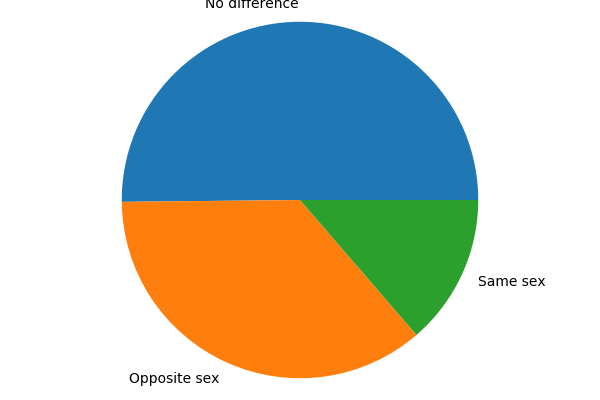

In [37]:
using StatsPlots
@df percent pie(:Friends, :x1)